EE7204 – Computer vision and Image Processing Take Home Assignment 2

PART 1

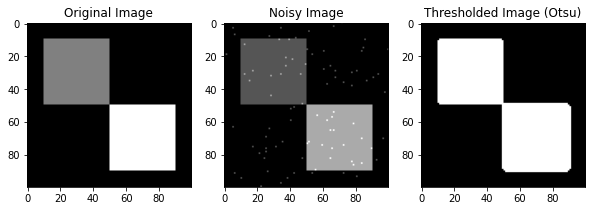

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Create an image with 2 objects and a total of 3-pixel values
img = np.zeros((100, 100), dtype=np.uint8)
img[10:50, 10:50] = 1
img[50:90, 50:90] = 2

# Add Gaussian noise to the image
gauss_noise = np.zeros((100,100), dtype=np.float32)
cv2.randn(gauss_noise, 0.6, 0.6)
gauss_noise = (gauss_noise*0.5).astype(np.uint8)

# Add noise to the original image
noisy_img = cv2.add(img, gauss_noise)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(noisy_img, (5, 5), 0)
threshold_value, thresholded_img = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Display the results
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(noisy_img, cmap='gray')
axs[1].set_title('Noisy Image')
axs[2].imshow(thresholded_img, cmap='gray')
axs[2].set_title('Thresholded Image (Otsu)')

plt.show()

PART 2

EG/2018/3347
Jayarathna J.M.V.M


<ipython-input-21-4f2d8e65371d>:34: RuntimeWarning: overflow encountered in ubyte_scalars
  if abs(img[x, y] - img[current_point[0], current_point[1]]) < thresh and region[x, y] == 0:


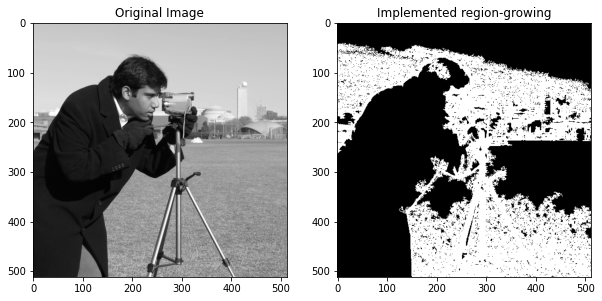

In [ ]:
import numpy as np
import cv2
from skimage import data
import matplotlib.pyplot as plt

image = data.camera()

# Define region growing function
def region_growing(img, seed, thresh):
    # Initialize the output image
    height, width = img.shape[:2]
    region = np.zeros_like(img)
    
    # Define the neighbors
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0), (-1, -1), (1, 1), (-1, 1), (1, -1)]
    
    # Create a list to hold the pixels to be checked
    check_list = [seed]
    
    # Loop until all pixels in the list have been checked
    while len(check_list) > 0:
        # Pop the first pixel from the list
        current_point = check_list.pop(0)
        
        # Check the neighbors of the current pixel
        for i in range(8):
            # Calculate the coordinates of the neighbor pixel
            x = current_point[0] + neighbors[i][0]
            y = current_point[1] + neighbors[i][1]
            
            # Check if the neighbor is within the image boundaries
            if 0 <= x < height and 0 <= y < width:
                # Check if the neighbor is within the threshold range
                if abs(img[x, y] - img[current_point[0], current_point[1]]) < thresh and region[x, y] == 0:
                    # Add the neighbor pixel to the region and the check list
                    region[x, y] = 255
                    check_list.append((x, y))
                    
    return region


# Set the seed point and threshold value
seed_point = (100, 100)
threshold = 220


# Apply region growing
region = region_growing(image, seed_point, threshold)

#Display the output image
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(region, cmap='gray')
axs[1].set_title('Implemented region-growing')

plt.show()

GitHub link -  https://github.com/virajjayarathna/Assignment01_3347.git

In [ ]:
!jupyter nbconvert --to pdf /content/Take_Home_Assignment_2.ipynb

[NbConvertApp] Converting notebook /content/Take_Home_Assignment_2.ipynb to pdf
[NbConvertApp] Support files will be in Take_Home_Assignment_2_files/
[NbConvertApp] Making directory ./Take_Home_Assignment_2_files
[NbConvertApp] Making directory ./Take_Home_Assignment_2_files
[NbConvertApp] Writing 31253 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 146692 bytes to /content/Take_Home_Assignment_2.pdf


In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa xfonts-encodings
  xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf apache2 | lighttpd
  | httpd libavalo